In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import levene, ttest_ind
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import math
import numpy as np
import os
import pandas as pd
import requests
import seaborn as sns
import statsmodels.api as sm
import warnings
import wrangle as w
import re
warnings.filterwarnings("ignore")

In [2]:
sns.set(rc={'figure.figsize':(16,9)})

In [3]:
df=w.get_explore_data()

In [4]:
df=w. prep_data(df, features=w.features)

In [5]:
df=w.rename_data(df)

In [6]:
df

,region,elevation,lat,lon,startdate,potential_evap,precip,barometric_pressure,all_atmos_precip,relative_humidity,sea_level_press,mean_temp,height_10_mb,height_100_mb,height_500_mb,height_850_mb,zonal_wind_250mb,zonal_wind_925mb,long_wind_250mb,long_wind_925mb
0,BSh,200,0.0,0.833333,2014-09-01,237.00,94.31,98644.97,42.45,81.72,101352.08,28.744480,31246.63,16666.81,5899.66,1535.52,-2.56,-5.22,-3.52,4.41
1,BSh,200,0.0,0.833333,2014-09-02,228.90,100.85,98686.80,42.66,82.56,101396.02,28.370585,31244.78,16667.31,5901.03,1538.00,-2.39,-5.20,-4.49,3.74
2,BSh,200,0.0,0.833333,2014-09-03,220.69,101.25,98712.85,43.23,83.29,101429.25,28.133059,31239.27,16668.39,5902.18,1540.32,-2.76,-5.00,-5.44,3.40
3,BSh,200,0.0,0.833333,2014-09-04,225.28,101.90,98711.70,43.11,83.26,101440.85,28.256798,31232.86,16667.39,5903.07,1541.10,-3.00,-4.61,-5.76,3.29
4,BSh,200,0.0,0.833333,2014-09-05,237.24,82.95,98686.46,42.98,82.50,101419.53,28.372353,31226.16,16665.65,5903.36,1539.73,-3.40,-4.25,-6.09,3.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375729,Dfb,100,1.0,0.866667,2016-08-27,312.05,57.45,97613.96,24.32,70.25,101373.91,17.150954,31484.23,16540.22,5763.23,1501.92,23.20,1.32,9.59,2.96
375730,Dfb,100,1.0,0.866667,2016-08-28,305.82,53.53,97631.29,23.92,71.08,101397.77,16.962051,31476.67,16534.71,5760.19,1502.70,23.18,1.40,7.14,2.30
375731,Dfb,100,1.0,0.866667,2016-08-29,311.62,52.12,97588.69,23.94,69.74,101368.67,16.915474,31464.71,16526.98,5754.76,1499.57,24.49,1.75,7.05,2.19
375732,Dfb,100,1.0,0.866667,2016-08-30,304.54,51.73,97538.62,23.61,69.71,101321.24,16.536761,31448.83,16512.39,5742.21,1493.14,25.80,1.84,7.74,1.88


In [7]:
train, validate, test=w.split_data(df, test_size=0.15)

In [8]:
train.head()

,region,elevation,lat,lon,startdate,potential_evap,precip,barometric_pressure,all_atmos_precip,relative_humidity,sea_level_press,mean_temp,height_10_mb,height_100_mb,height_500_mb,height_850_mb,zonal_wind_250mb,zonal_wind_925mb,long_wind_250mb,long_wind_925mb
116277,BSk,1800,0.454545,0.300000,2014-10-19,294.86,0.03,83362.52,8.53,28.94,101443.38,16.680867,30825.95,16475.47,5796.30,1504.26,18.22,-0.87,3.46,2.04
237629,Csb,1100,0.727273,0.066667,2014-10-25,127.70,63.74,89156.29,16.71,83.14,101841.63,5.987106,30801.60,16340.47,5689.14,1504.33,24.22,1.52,1.08,3.10
272599,BSk,800,0.772727,0.700000,2016-06-29,481.48,41.43,89665.38,22.36,54.72,101003.07,21.549640,31605.85,16624.04,5828.97,1492.70,23.68,-0.08,2.35,1.04
205713,Dfb,2000,0.636364,0.500000,2015-06-30,453.35,24.78,77957.43,17.11,47.80,101361.57,19.173942,31576.02,16662.35,5875.87,1505.58,15.35,0.50,5.52,1.09
120041,BSk,1900,0.454545,0.466667,2015-02-05,135.47,0.00,81613.28,6.06,62.50,102053.60,6.862285,30715.39,16357.43,5755.62,1535.91,19.55,0.42,-10.67,0.27


<AxesSubplot:xlabel='precip', ylabel='Count'>

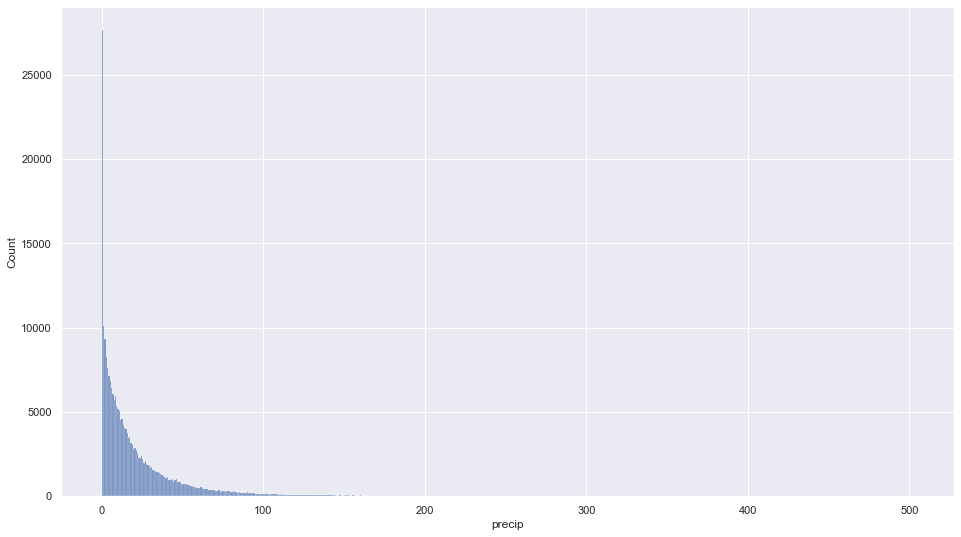

In [9]:
sns.histplot(data=train, x="precip")

<AxesSubplot:xlabel='potential_evap', ylabel='Count'>

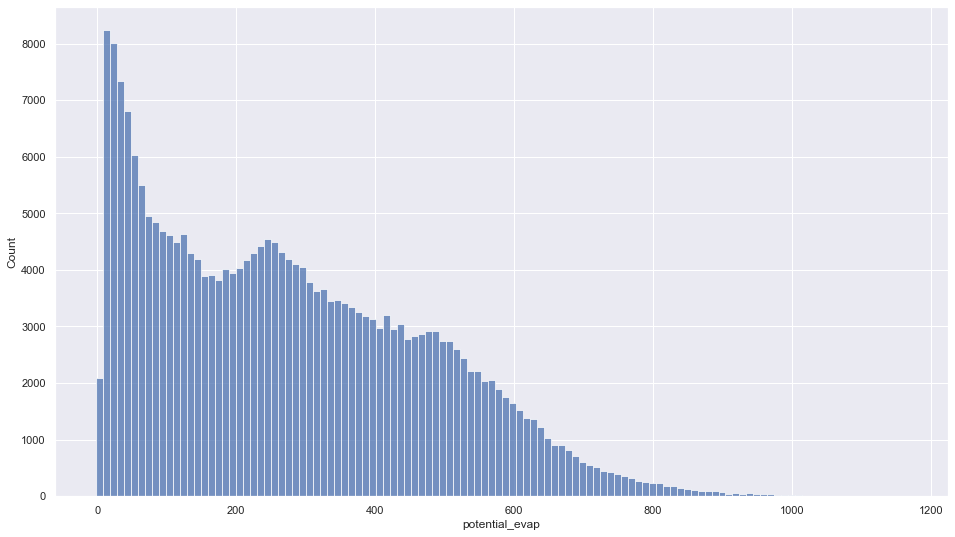

In [10]:
sns.histplot(data=train, x="potential_evap")

<AxesSubplot:xlabel='barometric_pressure', ylabel='Count'>

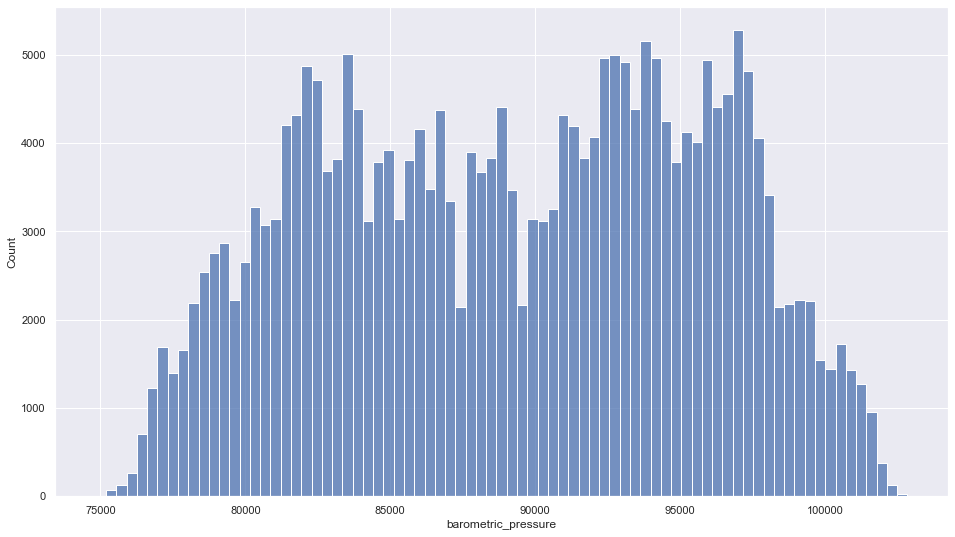

In [11]:
sns.histplot(data=train, x="barometric_pressure")

<AxesSubplot:xlabel='all_atmos_precip', ylabel='Count'>

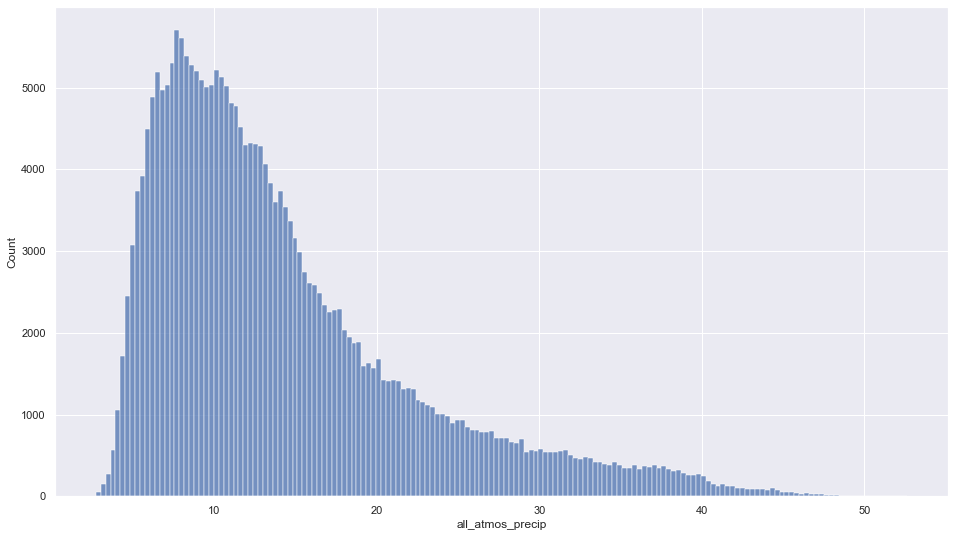

In [12]:
sns.histplot(data=train, x="all_atmos_precip")

<AxesSubplot:xlabel='relative_humidity', ylabel='Count'>

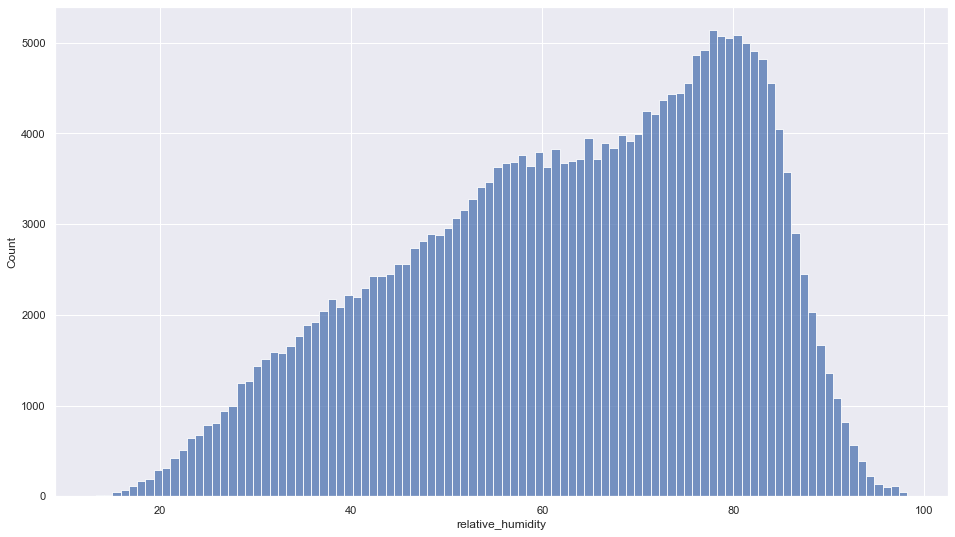

In [13]:
sns.histplot(data=train, x="relative_humidity")

<AxesSubplot:xlabel='sea_level_press', ylabel='Count'>

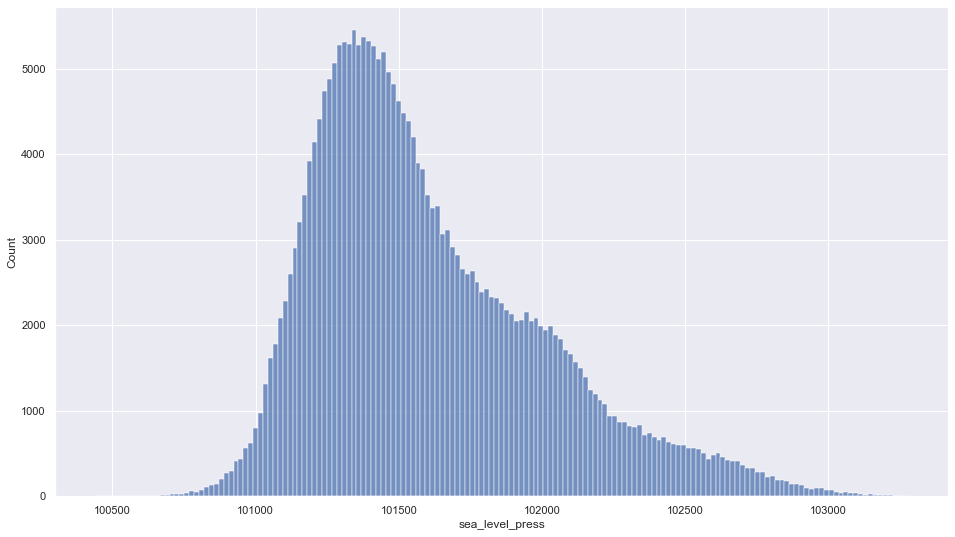

In [14]:
sns.histplot(data=train, x="sea_level_press")

<AxesSubplot:xlabel='mean_temp', ylabel='Count'>

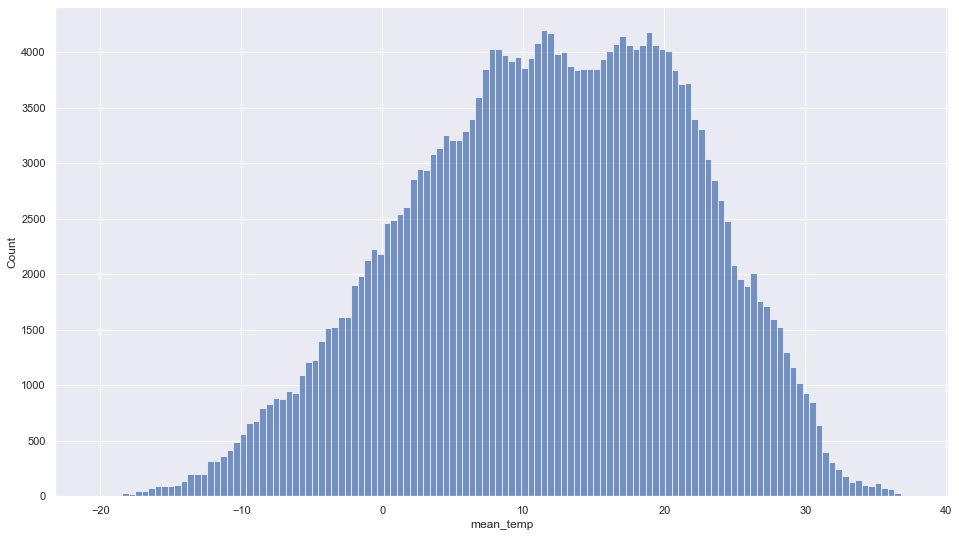

In [15]:
sns.histplot(data=train, x="mean_temp")

<AxesSubplot:xlabel='height_10_mb', ylabel='Count'>

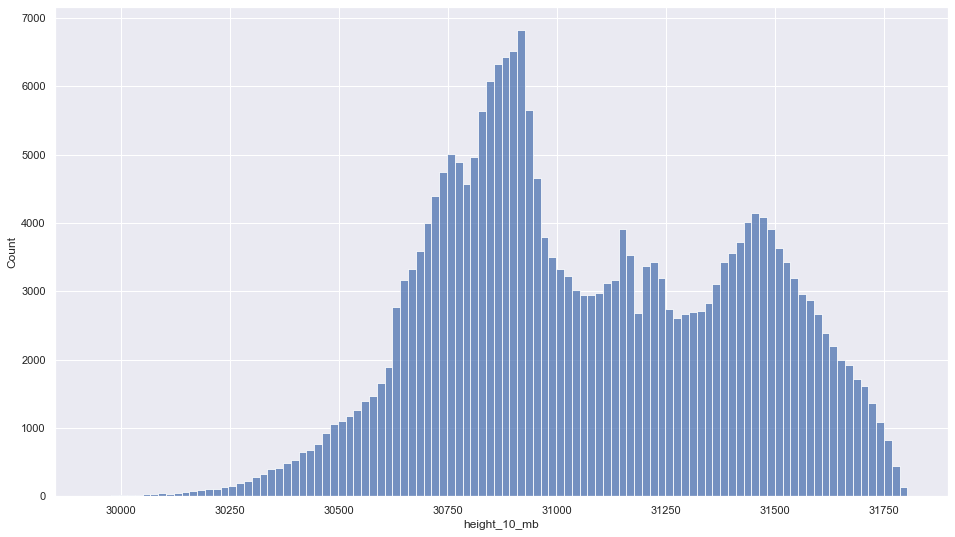

In [16]:
sns.histplot(data=train, x="height_10_mb")

<AxesSubplot:xlabel='height_100_mb', ylabel='Count'>

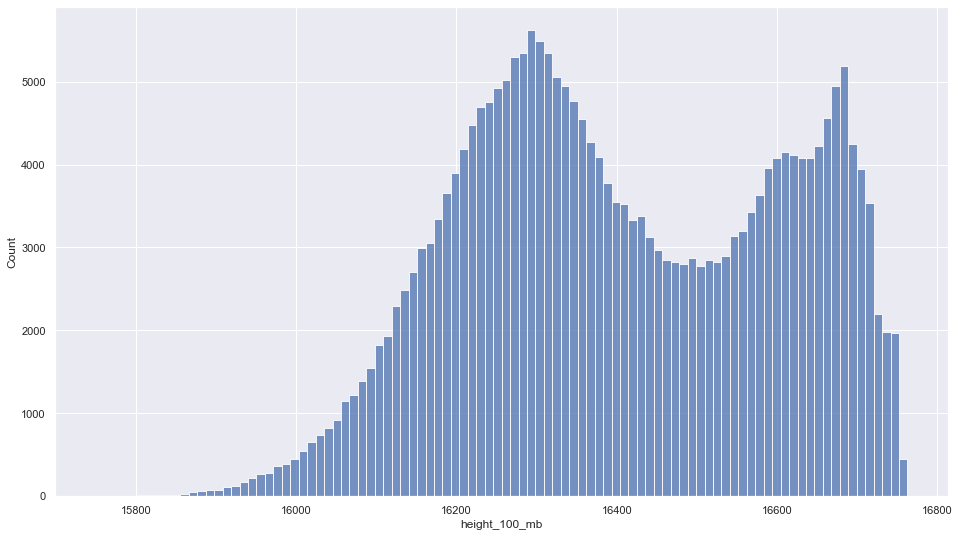

In [17]:
sns.histplot(data=train, x="height_100_mb")

<AxesSubplot:xlabel='height_500_mb', ylabel='Count'>

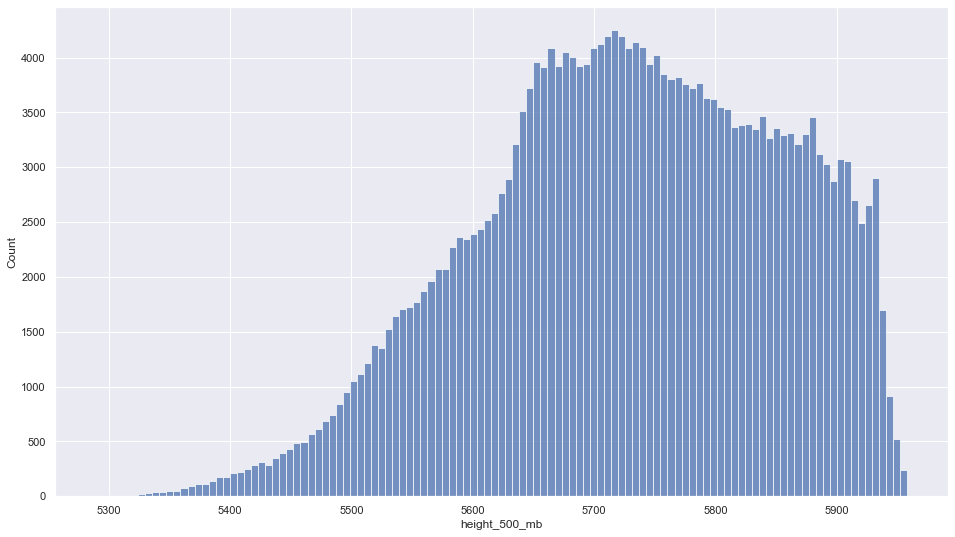

In [18]:
sns.histplot(data=train, x="height_500_mb")

<AxesSubplot:xlabel='height_850_mb', ylabel='Count'>

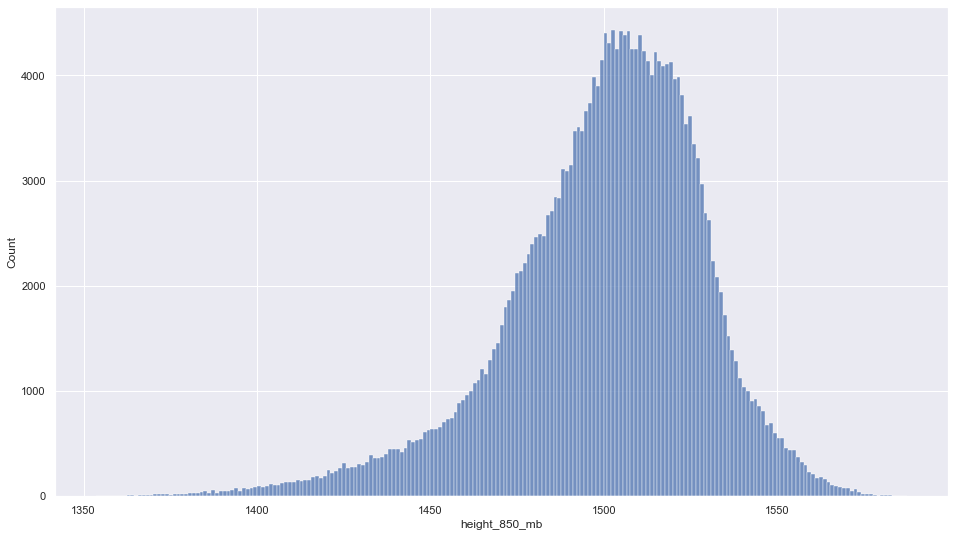

In [19]:
sns.histplot(data=train, x="height_850_mb")

<AxesSubplot:xlabel='zonal_wind_250mb', ylabel='Count'>

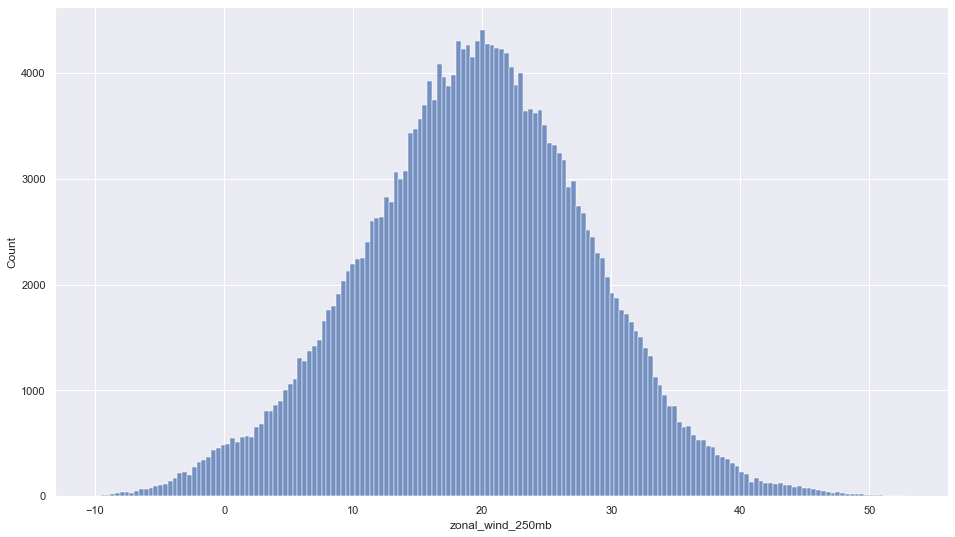

In [20]:
sns.histplot(data=train, x="zonal_wind_250mb")

<AxesSubplot:xlabel='zonal_wind_925mb', ylabel='Count'>

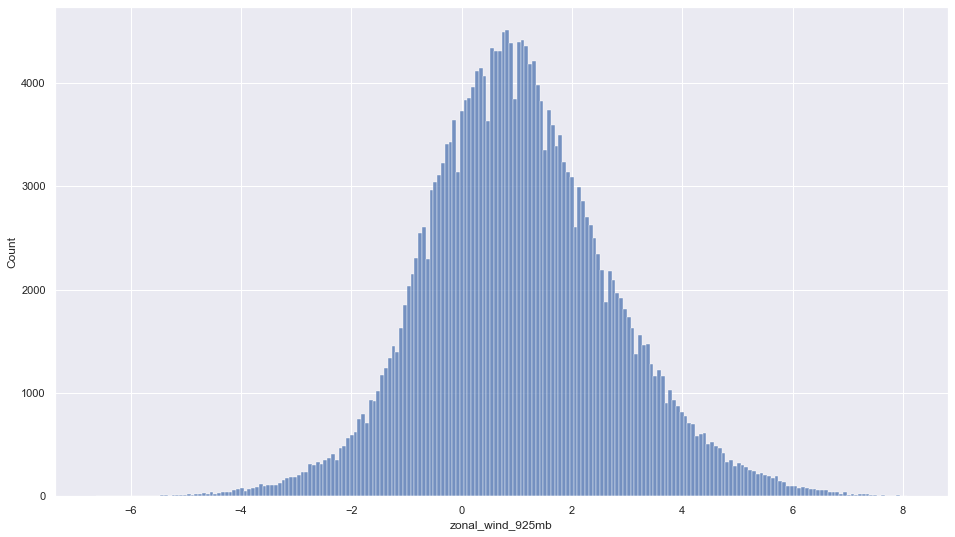

In [21]:
sns.histplot(data=train, x="zonal_wind_925mb")

<AxesSubplot:xlabel='long_wind_250mb', ylabel='Count'>

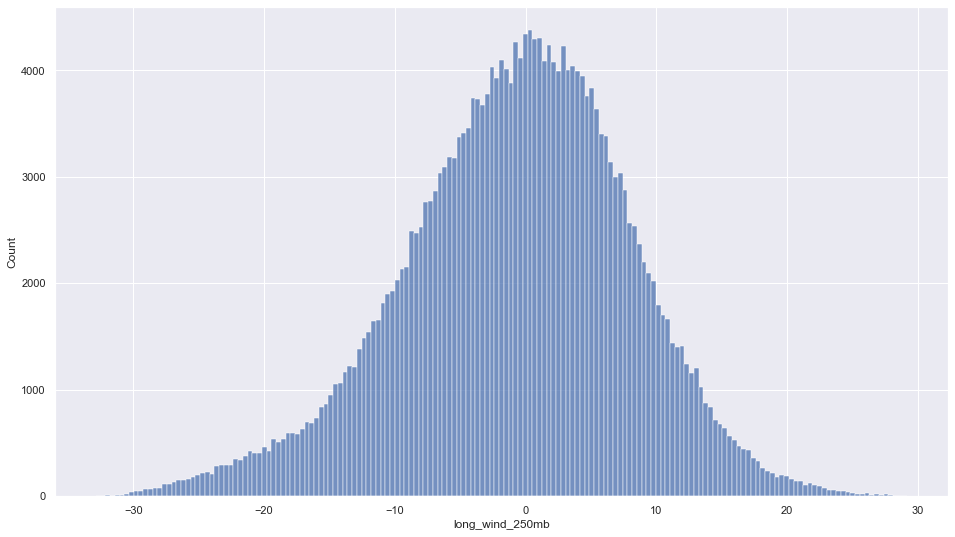

In [22]:
sns.histplot(data=train, x="long_wind_250mb")

<AxesSubplot:xlabel='long_wind_925mb', ylabel='Count'>

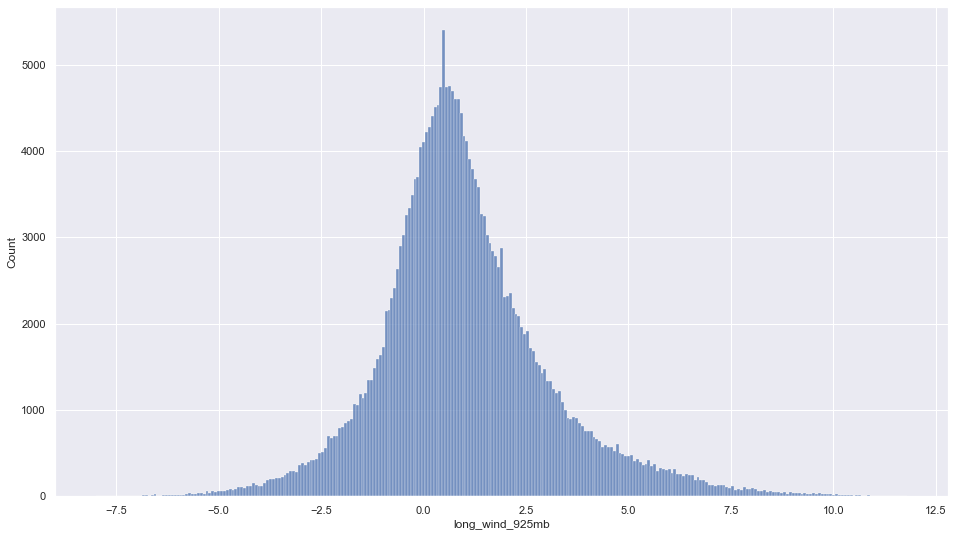

In [23]:
sns.histplot(data=train, x="long_wind_925mb")

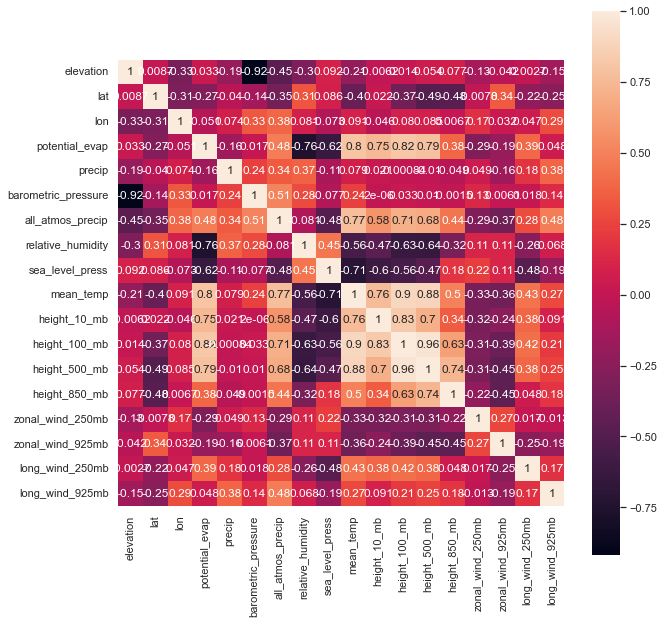

In [24]:
fig, ax = plt.subplots(figsize=(10,10))      
corr = train.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

In [25]:
train.groupby('region').mean_temp.mean()


region
BSh    20.827286
BSk    11.112124
BWh    22.156507
BWk    15.769549
Cfa    17.877389
Cfb    10.875411
Csa    15.653463
Csb    11.551213
Dfa    10.499463
Dfb     6.870593
Dfc     4.469191
Dsb     8.975918
Dsc     7.416453
Dwa     9.861026
Dwb     8.243420
Name: mean_temp, dtype: float64

<AxesSubplot:xlabel='region', ylabel='count'>

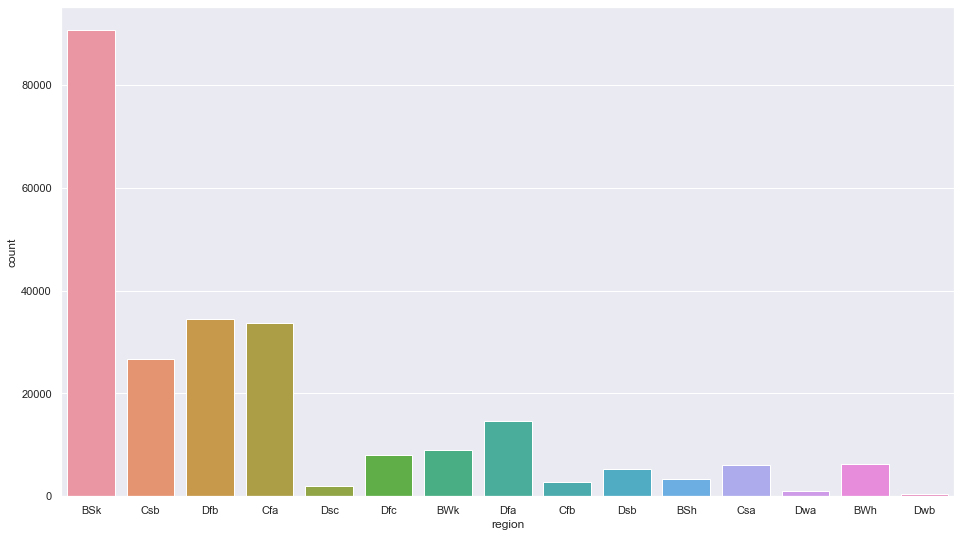

In [26]:
sns.countplot(x ='region', data = train)

In [27]:
#maps the column region, so that the regions are numeric, 
train['region_encoded'] = train.region.map({'BSk':0,
                                      'Dfb':1,
                                      'Cfa':2,
                                      'Csb':3,
                                      'Dfa':4,
                                      'BWk':5,
                                      'Dfc':6,
                                      'BWh':7,
                                      'Csa':8,
                                      'Dsb':9,
                                      'BSh':10,
                                      'Cfb':11,
                                      'Dsc':12,
                                      'Dwa':13,
                                      'Dwb':14})

In [28]:
sns.regplot(x='region_encoded', y='mean_temp', data= train, ax=ax)

<AxesSubplot:xlabel='region_encoded', ylabel='mean_temp'>

<AxesSubplot:xlabel='region_encoded', ylabel='count'>

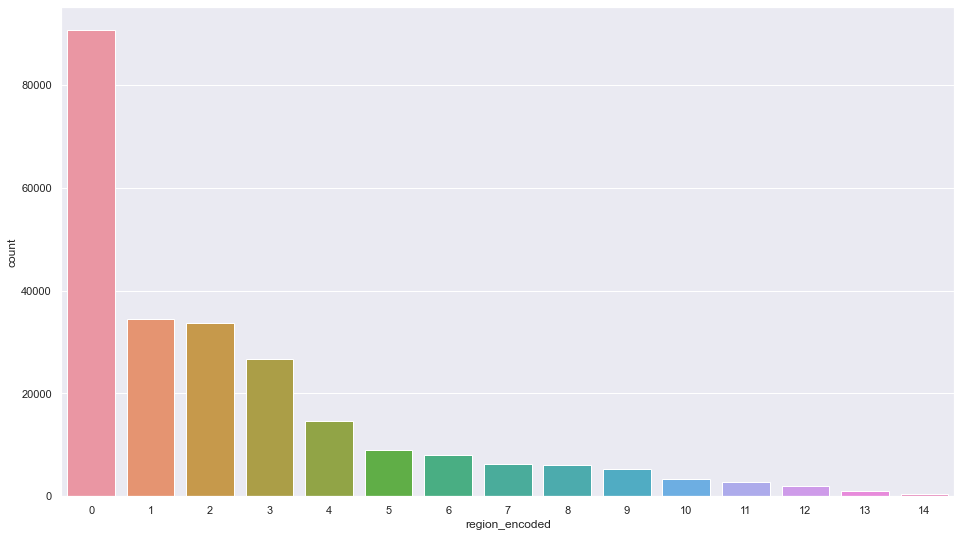

In [29]:
sns.countplot(x ='region_encoded', data = train)

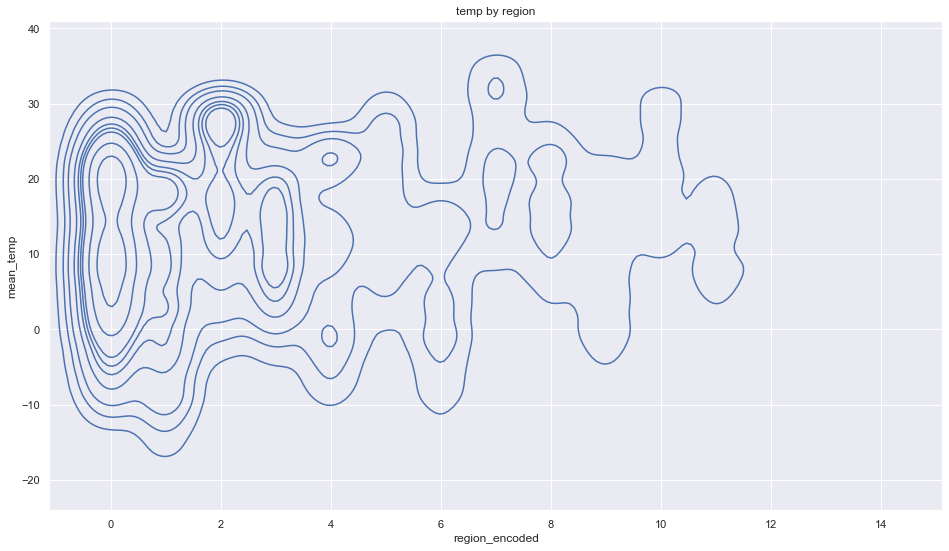

In [30]:
# looking closer at monthly charges and churn
sns.kdeplot(data=train, x='region_encoded', y='mean_temp')
rate = train.mean_temp.mean()
plt.title('temp by region')
plt.show()


In [ ]:
measurements = ['potential_evap','precip','barometric_pressure','all_atmos_precip','relative_humidity','sea_level_press','height_10_mb','height_100_mb','height_500_mb','height_850_mb','zonal_wind_250mb','zonal_wind_925mb','long_wind_250mb','long_wind_925mb']
for col in measurements:
    ax=sns.barplot(data=train, x='mean_temp', y=col)
    for i in ax.containers:
        ax.bar_label(i,)
        plt.show()

In [ ]:
Column names
potential_evap
precip
barometric_pressure
all_atmos_precip
relative_humidity
sea_level_press
mean_temp
height_10_mb
height_100_mb
height_500_mb
height_850_mb
zonal_wind_250mb
zonal_wind_925mb
long_wind_250mb
long_wind_925mb

In [ ]:
train['combined_location']=train.apply(lambda x:'%s,%s' % (train['lat'],train['lon']),axis=1)


In [ ]:
train.head()